# Problem 1-1: #<br>
1. <br>


> _(i) Drivers_: 

> -  The described situation can be categorized as a text-driven analysis, since the company now has access and the means to analyse a large amount of customer data of its interest. The goal is kept relatively vague because there is no current hypothesis to prove, at the same time there are also no predefined methods.

> _(ii) Objectives_: 

> -  The main goal of the project is to extract useful information about the customer needs. Therefor the digitalized data must be analysed in a way, which makes it clear what preferences regarding the offered services do the costumers have. The data is available in form of scanned PDFs, so the used methods should be robust in terms of (pre-)processing of this data. Since the analysis should give a better understanding of the needs, the services may be modified in curtain way, which would allow better customer satisfaction and lead to a higher revenue. The revenue by service/product is a measurable property to evaluate the objectives.

> _(iii) Data availability_: 

> -  The data can be sorted by the service and priority of the customer group. It should include the customer feedback regarding curtain services as well as financial information about the offered services, which are used by the customers. The overall interest in the generally available data is already given since it’s a text-driven analysis.

> _(iv) Cost factor_: 

> -  The digitalization as well as the pre-processing of the printouts can be a time costly process. Since the financial aspects play a key role in achieving the objectives, there might be a need of additional computational resources to be able to aggregate this data.

2. <br>

> _Advantages_: 
    > -  Distributed architecture makes it extremely scalable
    > -  Speed and high performance on the search
    
> _Disadvantages_: 
    > -  No ACID support can lead to inconsistencies
    > -  As a NoSQL DB it has no strict database model. This can complicate error handling.

    
3. <br>

(i) **Stop word removal:** <br>

> _Advantages_: 
    > -  Reduces Data set size
    > -  Can improve efficiency of text analysis, since the key words are found easier 


> _Disadvantages_: 
    > -  In case of sentiment analysis, stop words can be crucial for meaning. Accidentally removing stop word relevant for sentiment can lead to wrong analysis
    > -  Using a premade list, requires extra work to make sure list fits to specific project. Creating new project-specific list can be incredibly time-consuming.


(ii) **Stemming:** <br>
> _Advantages_: 
    > -  straightforward implementation, either with plenty of preexisting stemmers, or by implementing simple rules for stemming.
    > -  Improves finding related documents, since one can look for variations of a word including the stem, instead of just the single word (E.g. 'running': one can look for related documents containing words with 'run', 'runs', 'runner')


> _Disadvantages_: 
    > -  Can be ambiguous. E.g. in the case different tenses of words have a different Stem (is, am, was). Or can lead to false stems (e.g. uncle -> uncl)
    > -  Only works for languages with simple 



# Problem 1-2 #
1.

In [72]:
def verify_regex(expression):
    
    #Check, that input is a String
    if(not isinstance(expression, str)):
        print("Input is not a String.")
        return False
    
    #Split expression into a list of all individual characters
    chars = list(expression)
    
    output = True
    
    #For Condition(ii): Flag is True if the previous character was ^|*+?
    special_char_flag = False
    
    #For Condition(iii): Flag is True if an unresolved open bracket exists
    numb_open_brackets = 0

    for i in range(len(chars)):
        #Condition (i):
        char_ascii_value = ord(chars[i])
        
        #Regex equivalent: char_ascii_value.match([\d])
        if(char_ascii_value in range(ord('0'), ord('9'))):
            continue
        
        #Regex equivalent: char_ascii_value.match([A_Za-z])
        if(char_ascii_value in range(ord('A'), ord('Z')) or char_ascii_value in range(ord('a'), ord('z'))):
            continue
            
        #ASCII values of Ä,Ö,Ü,ß,ä,ö,ü respectively
        umlaut_chars = [ord('Ä'), ord('Ö'), ord('Ü'), ord('ß'), ord('ä'), ord('ö'), ord('ü')]
        if(char_ascii_value in umlaut_chars):
            continue
        
        
        #Condition (ii):
        special_chars = [ord('^'), ord('|'), ord('*'), ord('+'), ord('?')]
        char_is_special = char_ascii_value in special_chars
        
        #check, if the flag for previous special character is raised and the current character is also special
        if(special_char_flag and char_is_special):
            print("Two special characters next to each other.")
            output = False
            break
            
        #Raise flag, if current character is special character        
        if(char_is_special):
            special_char_flag = True
        else:
            special_char_flag = False
        
        
        #Condition (iii):
        if(char_ascii_value == ord('(')):
            numb_open_brackets += 1
        elif(char_ascii_value == ord(')')):
            numb_open_brackets -= 1        
        
        #A closing bracket isn't allowed, without an opening bracket preceding it.
        if(numb_open_brackets < 0):
            break
    
    #Check for condition(iii)
    if(numb_open_brackets != 0):
        print("Use of brackets is incorrect.")
        output = False
        
    print("Output is", output)
    return output

#example call
verify_regex('asd(asd)äöä)?^ü')

Use of brackets is incorrect.
Output is False


False

2. 

Regular expression can provide an easy way, to parse HTML content. Since HTML is often well-structured, with its form following known and common structures, separated through tags easy to filter by with RegEx, basic HTML files can be parsed with RegEx. For example, one can easily filter out the tags used in HTML by removing expressions in '< >' brackets, or look for links in an HTML file. However, the more complex the structure of an HTML file, often regular expression isn't enough, to parse the file correctly. The RegEx parser an miss important information, or end up with broken/bad data.
Therefore, for general purpose and use, RegEx is sufficient to parse HTML, but it's not consistent and I wouldn't rely on RegEx to parse HTML if it is important to get complete and clean information. 

# Problem 1-3 #
1.

# Information Extraction from PDF Documents

In this assignment you have to convert a set of PDFs to raw text and extract information from the files using regular expressions.

Download the folders containing PDF files provided via Moodle (1-3-pdf-files.zip). Since the PDF format cannot be directly used to process text, you first have to convert the file contents to plain text.
Find two different methods to convert PDFs to text, and compare their performance. You should provide a quantitative and qualitative analysis. For comparison of two generated files, use Python’s SequenceMatcher.ratio(). With this analysis as a basis, choose one of the methods, and provide the processed raw text files in the submission folder. Justify your decision!

In [73]:
import time
from  PyPDF2 import PdfReader

In [74]:
import glob

files = glob.glob('1-3-pdf-files/**/*.pdf', recursive=True)
files

['1-3-pdf-files/scans/double_ocr.pdf',
 '1-3-pdf-files/scans/single_ocr.pdf',
 '1-3-pdf-files/iban/liste1.pdf',
 '1-3-pdf-files/flyers/wegweiser_senioren.pdf',
 '1-3-pdf-files/flyers/bahnstadt.pdf',
 '1-3-pdf-files/flyers/bundeswehr.pdf']

In [75]:
reader = PdfReader(r"1-3-pdf-files/iban/liste1.pdf")
page = reader.pages[0]
print(page.extract_text())

IBAN – Länderliste für den internationalen Zahlungsverkehr
Verwenden Sie im grenzüberschreitenden Zahlungsverkehr mit diesen Ländern konsequent IBAN und BIC.
Stand am 1. Januar 20211 inkl. Französisch Guyana, Französisch Polynesien, Französisch Süd- und Antarktisgebiete, Guadeloupe, 
Martinique, Mayotte, Neukaledonien, Reunion, St. Pierre und Miquelon, Saint-Barthélemy, Saint-Martin 
(französischer Teil), Wallis und Futuna
2 inkl. Guernsey, Isle of Man, Jersey, NordirlandEUROPA LÄNDERCODE ANZAHL STELLEN BEISPIEL EINER FIKTIVEN IBAN
Albanien AL 28 AL07 2121 1009 0000 0002 3569 8741
Andorra AD 24 AD02 0001 2030 2003 5910 0100
Belgien BE 16 BE08 5390 0754 7034
Bosnien Herzegowina BA 20 BA09 1290 0794 0102 8494
Bulgarien BG 22 BG00 BNBG 9661 1020 3456 78
Dänemark DK 18 DK00 0040 0440 1162 43
Deutschland DE 22 DE00 7005 1755 0000 0072 29
Estland EE 20 EE08 2200 2210 2014 5685
Färöer Inseln FO 18 FO00 0040 0440 1162 43
Finnland FI 18 FI01 1234 5600 0007 85
Frankreich1FR 27 FR04 2004 1010 050

In [76]:
start = time.time()

for file in files:
    reader = PdfReader(file)
    for page in reader.pages:
        page.extract_text()

end = time.time()
print(end-start)

5.953862905502319


In [77]:
from tika import parser

In [78]:
start = time.time()
for file in files:
    parsed_pdf = parser.from_file(file)
    data = parsed_pdf['content']
end = time.time()
print(end-start)

0.9297311305999756


In [79]:
from difflib import SequenceMatcher

In [80]:
results = []
for file in files:
    reader = PdfReader(file)
    pypdf2_result = ""
    for page in reader.pages:
        pypdf2_result = pypdf2_result + page.extract_text()
    parsed_pdf = parser.from_file(file)
    tika_result = parsed_pdf['content']
    ratio = SequenceMatcher(None, pypdf2_result, tika_result).ratio()
    results.append(ratio)
    print(ratio)

0.9459807073954984
0.9856059132464501
0.9670001149821777
0.9697793826370479
0.9206983883346125
0.9648005235824899


In [81]:
import difflib

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'double_ocr.pdf'),
  Text(1, 0, 'single_ocr.pdf'),
  Text(2, 0, 'liste1.pdf'),
  Text(3, 0, 'wegweiser_senioren.pdf'),
  Text(4, 0, 'bahnstadt.pdf'),
  Text(5, 0, 'bundeswehr.pdf')])

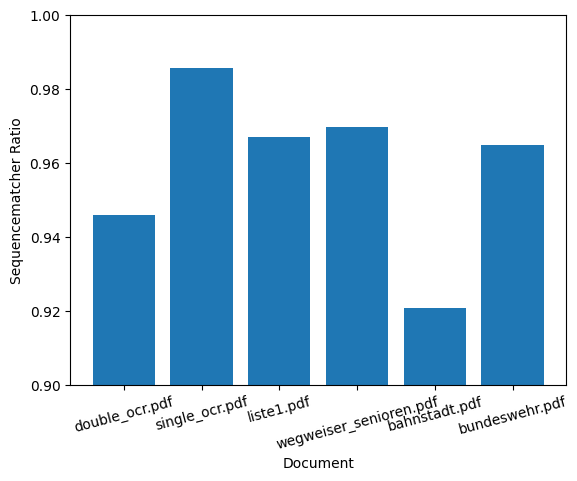

In [82]:
from matplotlib import pyplot as plt
xlabels = [file.split("/")[-1] for file in files]
plt.bar(xlabels, results)
plt.ylim(0.9, 1)
plt.ylabel("Sequencematcher Ratio")
plt.xlabel("Document")
plt.xticks(rotation=15)

In [83]:
data = [entry for entry in data.split("\n") if len(entry)>0]

In [84]:
pdfR = reader.pages[0].extract_text().split("\n")
pdfR.extend(reader.pages[1].extract_text().split("\n"))

In [86]:
counter = 0
for pdfText in pdfR:
    if pdfText in data:
        counter = counter +1
    else: print(pdfText)
counter

BB)Telefax(IVB
34Oldenburg 2613
31.PzDivPressestelle@
heer.de+49 441
360-2150+49 441
cher StraßeVeits-
höchheim9720
910.PzDivPressestel-
heer.de+49 931
9707-3160+49 931
do der BundeswehrHauptadresse Am Eichel-
bergBruchsal 7664
6ABCAbwKdoBwPres-
sis.de+49 7251
938 2500+49 7251
sichtsstelleHauptadresse Uhlandstra-
ße 88-90Berlin 1071
7infoapas@apasbafa.b
und.de+49 6196
e. V.Hauptadresse Hochstraße 8 München 8166
9sekretariat@stifterver-
ein.de+49 89
622716-30+49 89 48
4Berlin 1011
7info@adk.de
http://www.adk.de+49 30
HansaviertelHanseaten-
weg 10Berlin 1055
7info@adk.de
http://www.adk.de+49 30
20057-2000+49 30
ortRobert-Koch-
Platz 10Berlin 1011
5benutzerservice@adk.
http://www.adk.de+49 30
20057-3247+49 30
chivLuisenstraße
60Berlin 1011
7kunstsammlung@adk.
http://www.adk.de+49 30
20057-4000+49 30
ArchivChaussee-
straße 125Berlin 1011
5bertoltbrechtarchiv@a
http://www.adk.de+49 30
20057-1800+49 30
Leibniz-GemeinschaftHauptadresse Vahrenwal-
247Hannover 3017
9arl@arl-net.de
http://www.ar

182

In [16]:
counter = 0
for pdfText in data:
    if pdfText in pdfR:
        counter = counter +1
    else: print(pdfText)
counter

BB)
Telefax(IVB
34
Oldenburg 2613
3
1.PzDivPressestelle@
heer.de
+49 441
360-2150
+49 441
cher Straße
Veits-
höchheim
9720
10.PzDivPressestel-
heer.de
+49 931
9707-3160
+49 931
do der Bundeswehr
Hauptadresse Am Eichel-
berg
Bruchsal 7664
6
ABCAbwKdoBwPres-
sis.de
+49 7251
+49 7251
sichtsstelle
Hauptadresse Uhlandstra-
ße 88-90
Berlin 1071
infoapas@apasbafa.b
+49 6196
e. V.
Hauptadresse Hochstraße 8 München 8166
sekretariat@stifterver-
+49 89
622716-30
+49 89 48
4
Berlin 1011
info@adk.de
http://www.adk.de
+49 30
Hansaviertel
Hanseaten-
weg 10
Berlin 1055
info@adk.de
http://www.adk.de
+49 30
20057-2000
+49 30
ort
Robert-Koch-
Platz 10
Berlin 1011
5
benutzerservice@adk.
http://www.adk.de
+49 30
20057-3247
+49 30
chiv
Luisenstraße
60
Berlin 1011
kunstsammlung@adk.
http://www.adk.de
+49 30
20057-4000
+49 30
Archiv
Chaussee-
straße 125
Berlin 1011
5
bertoltbrechtarchiv@a
http://www.adk.de
+49 30
20057-1800
+49 30
Leibniz-Gemeinschaft
Hauptadresse Vahrenwal-
247
Hannover 3017
arl@arl-net.de
h

.bund.de
http://www.bamf.de
+49 651
1463-0
+49 651
1463-199
Bundesamt für Migrati-
on und Flüchtlinge
Außenstelle -
Würzburg
Veitshöchhei-
mer Straße
100
Würzburg 9708
0
Ref335Posteingang@
bamf.bund.de
http://www.bamf.de
+49 931
9807-0
+49 931
9807-199
Bundesamt für Migrati-
on und Flüchtlinge
Außenstelle -
Zirndorf (in
AnkER-Ein-
richtung)
Rothenbur-
ger Straße 29
Zirndorf 9051
3
M1Posteingang@bamf
.bund.de
http://www.bamf.de
+49 911
943-0
+49 911
943-3499
Bundesamt für Natur-
schutz
Hauptadresse Konstantin-
straße 110
Bonn 5317
pbox-bfn@bfn.de
http://www.bfn.de
+49 228
8491-0
+49 228
8491-9999
Bundesamt für Natur-
schutz
Außenstelle
Leipzig
Karl-Lieb-
knecht-Stra-
ße 143
Leipzig 0427
pbox-bfn-
leipzig@bfn.de
http://www.bfn.de
+49 341
30977-0
+49 341
30977-40
Bundesamt für Natur-
schutz
Außenstelle
Vilm / Interna-
tionale Natur-
schutzakade-
mie Insel Vilm
Putbus 1858
1
ina.vilm@bfn-vilm.de
http://www.bfn.de
+49 38301
86-0
+49 38301
86-117
Bundesamt für See-
schifffahrt und Hydro-
gra

399-0
+49 261
399-1199
Bundespolizeidirekti-
on München
Hauptadresse Infanteriestra-
ße 6
München 8079
bpold.muenchen@po-
lizei.bund.de
http://www.bundespoli-
zei.de
+49 89
12149-0
+49 89
12149-1199
Bundespolizeidirekti-
on Pirna
Hauptadresse Rottwerndor-
fer Straße 22
Pirna 0179
6
bpold.pirna@polizei.bu
nd.de
http://www.bundespoli-
zei.de
+49 3501
795-60
+49 3501
782-915
Bundespolizeidirekti-
on Sankt Augustin
Hauptadresse Bundesgrenz-
schutzstraße
100
Sankt Au-
gustin
5375
bpold.sanktaugustin@
polizei.bund.de
http://www.bundespoli-
zei.de
+49 2241
238-0
+49 2241
238-1199
Bundespolizeidirekti-
on Stuttgart
Hauptadresse Wolfgang-
Brumme-Al-
lee 52
Böblingen 7103
4
bpold.stuttgart@poli-
zei.bund.de
http://www.bundespoli-
zei.de
+49 7031
2128-0
+49 7031
2128-1170
Bundespolizeipräsidi-
um
Hauptadresse Heinrich-
Mann-Allee
103
Potsdam 1447
3
bpolp@polizei.bund.de
http://www.bundespoli-
zei.de
+49 331
97997-0
+49 331
97997-1010
Bundespräsident Hauptadresse Spreeweg 1 Berlin 1055
poststelle@

0
info@cimonline.de
http://www.cimonline.d
+49 6196-
79-3500
+49 6196-
79-3650
ConAct - Koordinie-
rungszentrum Deutsch
-Israelischer Jugend-
austausch
Hauptadresse Altes Rat-
haus - Markt
26
Luther-
stadt-Wit-
tenberg
0688
6
info@ConAct-org.de
http://www.conact-
org.de
+49 3491
4202-60
+49 3491
4202-70
Conterganstiftung für
behinderte Menschen
Hauptadresse Von-Gablenz-
Straße 2-6
Köln 5067
geschaeftsstelle@con-
tergan.bund.de
http://www.contergan-
infoportal.de
+49 221
3673-3673
+49 221
3673-3636
Continentale Betriebs-
krankenkasse
Hauptadresse Sengelmann-
straße 120
Hamburg 2233
5
kundenservice@conti-
nentale-bkk.de
http://www.continenta-
le-bkk.de
+49
800262626
+49 40 526
777 1125
dbb Beamtenbund und
Tarifunion
Hauptadresse Friedrichstra-
ße 169
Berlin 1011
7 http://www.dbb.de
+49 30
4081-40
+49 30
4081-4999
DBFZ Deutsches Bio-
masseforschungszen-
trum gemeinnützige
GmbH
Hauptadresse Torgauer
Straße 116
Leipzig 0434
info@dbfz.de
http://www.dbfz.de
+49 341
2434-112
+49 341
2434-133
D

BB)
Telefax(IVB
Entschädigungsein-
richtung des Bundes-
verband Öffentlicher
Banken Deutschlands
GmbH
Hauptadresse Lennéstraße
11
Berlin 1078
5
einlagensicherung@vo
eb-edoe.de.de
http://www.voeb-
edoe.de
+49 30
8192-0
+49 228
8192-232
Entschädigungsein-
richtung deutscher
Banken GmbH
Hauptadresse Burgstraße
28
Berlin 1017
8
ino@edb-banken.de
http://www.edb-ban-
ken.de
+49 30
5900 1196-
0
Erdölbevorratungsver-
band
Hauptadresse Jungfern-
stieg 38
Hamburg 2035
4
info@ebv-oil.org
http://www.ebv-oil.org
+49 40
350012-0
+49 40
350012-149
Europäisches Zen-
trum für Minderheiten-
fragen
Hauptadresse Schiffbrücke
12
Flensburg 2493
info@ecmi.de
http://www.ecmi.de
+49 461
14149-0
+49 461
14149-19
Evangelisches Kir-
chenamt für die Bun-
deswehr
Hauptadresse Jebensstra-
ße 3
Berlin 1062
3 http://www.militaer-
seelsorge.bundes-
wehr.de
+49 30
310181-0
+49 30
310181-105
Fachagentur Nach-
wachsende Rohstoffe
e. V.
Hauptadresse Hofplatz 1 Gülzow 1827
6
info@fnr.de
http://www.fnr.de
+49 3843
6930-0
+49

42825-593
+49 40
42825-547
gkv informatik Hauptadresse Lichtscheider
Straße 89
Wuppertal 4228
5
info@gkvi.de
http://www.gkvinforma-
tik.de
+49 202
6958-1102
+49 202
6958-1109
Goethe-Institut e. V. Hauptadresse Oskar-von-
Miller-Ring 18
München 8033
3
info@goethe.de
http://www.goethe.de
+49 89
15921-0
+49 89
15921-450
Goethe-Institut e. V. Hauptstadt-
büro Berlin
Neue Schön-
hauser Stra-
ße 20
Berlin 1017
8
hauptstadtbuero@goet
he.de
http://www.goethe.de
+49 30
25906-473
+49 30
25906-565
Hanns-Seidel-Stiftung
e. V.
Hauptadresse Lazarettstra-
ße 33
München 8063
6
info@hss.de
http://www.hss.de
+49 89
1258-0
+49 89
1258-356
Hans-Böckler-Stiftung Hauptadresse Hans-Böck-
ler-Straße 39
Düssel-
dorf
4047
6
zentrale@boeckler.de
http://www.boeckler.de
+49 211
7778-0
+49 211
7778-120
Hauptzollamt Aachen Hauptadresse Eisenbahn-
weg 18
Aachen 5206
8
poststelle.hza-aa-
chen@zoll.bund.de
http://www.zoll.de
+49 241
9091-0
+49 241
9091-1500
Hauptzollamt Augs-
burg
Hauptadresse Prinzregen-
tenplatz 3
Au

Hauptadresse Helmut-Koh-
le-Allee 4
Bonn 5311
3
info@bundeskunsthal-
le.de
kunsthalle.de
+49 228
9171-0
+49 228
234154
Kunstverwaltung des
Bundes
Hauptadresse DGZ-Ring 12 Berlin 1308
6
Kunstverwaltung@kvd
b.bund.de
http://www.kunstver-
waltung.bund.de
Kuratorium für Tech-
nik und Bauwesen in
der Landwirtschaft e.
V.
Hauptadresse Bartningstra-
ße 49
Darmstadt 6428
ktbl@ktbl.de
http://www.ktbl.de
+49 6151
7001-0
+49 6151
7001-123
Kuratorium für Waldar-
beit und Forsttechnike.
V.
Hauptadresse Spremberger
Straße 1
Goß-Um-
stadt
6482
3
info@kwf-online.de
http://www.kwf-
online.de
+49 6078
785-0
+49 6078
758-39
Landeskommando Ba-
den-Württemberg
Hauptadresse Nürnberger
Straße 184
Stuttgart 7037
4
LKdoBWZentralerPo-
steingang@bundes-
http://www.lkdo-
bw.streitkraeftebasis.d
+49 711
5210 0
+49 711
5210 4096
Landeskommando
Bayern
Hauptadresse Ingolstädter
Straße 240
München 8093
Pressestelle-LKdo-
BY@bundeswehr.org
http://www.lkdo-
by.streitkraeftebasis.d
+49 089
3168 6040
Landeskommando
Brande

TÜV-Rheinland Hauptadresse Am Grauen
Stein
Köln 5110
5
internet@de.tuv.com
http://www.tuv.com
+49 221
806-0
+49 221
806-114
Umweltbundesamt Hauptadresse Wörlitzer
Platz 1
Dessau-
Roßlau
0684
4
buergerservice@uba.d
http://www.umweltbun-
desamt.de
+49 340
2103-0
+49 340
2103-2285
Seite 63 von 80
BB)
Telefax(IVB
Umweltbundesamt Dienstgebäu-
de Berlin-
Dahlem
Corrensplatz
1
Berlin 1419
5
buergerservice@uba.d
http://www.umweltbun-
desamt.de
+49 30
8903-0
+49 30
8903-1830
Umweltbundesamt Dienstgebäu-
de Berlin-
Grunewald
Bismarck-
platz 1
Berlin 1419
3
buergerservice@uba.d
http://www.umweltbun-
desamt.de
+49 30
8903-0
+49 30
8903-5613
Umweltbundesamt Dienstgebäu-
de Berlin-Ma-
rienfelde
Schichauweg
58
Berlin 1230
buergerservice@uba.d
http://www.umweltbun-
desamt.de
+49 30
8903-0
+49 30
8903-5613
Umweltbundesamt Dienstgebäu-
de Langen
Paul-Ehrlich-
Straße 29
Langen 6322
5
buergerservice@uba.d
http://www.umweltbun-
desamt.de
+49 6103
704-0
+49 6103
704-147
Umweltbundesamt Dienstgebäu-
de Bad E

306-155
Wasserstraßen- und
Schifffahrtsamt Rhein
(Dienstort Bingen)
Außenbezirk
Wiesbaden
Hafenweg 13 Wiesba-
den
6520
1
abz-
wiesbaden@wsv.bund
.de
http://www.wsa-
rhein.wsv.de
+49 611
541077-0
+49 611
541077-26
Wasserstraßen- und
Schifffahrtsamt Rhein
(Dienstort Bingen)
Außenbezirk
St. Goar
Am Hafen 16 St. Goar 5632
abz-
st.goar@wsv.bund.de
http://www.wsa-
rhein.wsv.de
+49 6741
9203-0
+49 6741
9203-26
Wasserstraßen- und
Schifffahrtsamt Rhein
(Dienstort Bingen)
Außenbezirk
Koblenz
Emser Stra-
ße 30a
Koblenz 5607
6
abz-
koblenz@wsv.bund.de
http://www.wsa-
rhein.wsv.de
+49 261
9819-0
+49 261
9819-2777
Wasserstraßen- und
Schifffahrtsamt Rhein
(Dienstort Bingen)
Außenbezirk
Brohl
Koblenzer
Straße / Am
Hafen
Brohl-Lüt-
zing
5665
6
abz-
brohl@wsv.bund.de
http://www.wsa-
rhein.wsv.de
+49 2633
47295-0
+49 2633
47295-24
Wasserstraßen- und
Schifffahrtsamt Rhein
(Dienstort Köln)
Hauptadresse An der Mün-
ze 8
Köln 5066
8
wsa-
rhein@wsv.bund.de
http://www.wsa-
rhein.wsv.de
+49 221
97350-0
+49 221


1603

In [87]:
counter = 0
for pdfText in data:
    if pdfText in pdfR:
        counter = counter +1
    else: print(pdfText)
counter

BB)
Telefax(IVB
34
Oldenburg 2613
3
1.PzDivPressestelle@
heer.de
+49 441
360-2150
+49 441
cher Straße
Veits-
höchheim
9720
10.PzDivPressestel-
heer.de
+49 931
9707-3160
+49 931
do der Bundeswehr
Hauptadresse Am Eichel-
berg
Bruchsal 7664
6
ABCAbwKdoBwPres-
sis.de
+49 7251
+49 7251
sichtsstelle
Hauptadresse Uhlandstra-
ße 88-90
Berlin 1071
infoapas@apasbafa.b
+49 6196
e. V.
Hauptadresse Hochstraße 8 München 8166
sekretariat@stifterver-
+49 89
622716-30
+49 89 48
4
Berlin 1011
info@adk.de
http://www.adk.de
+49 30
Hansaviertel
Hanseaten-
weg 10
Berlin 1055
info@adk.de
http://www.adk.de
+49 30
20057-2000
+49 30
ort
Robert-Koch-
Platz 10
Berlin 1011
5
benutzerservice@adk.
http://www.adk.de
+49 30
20057-3247
+49 30
chiv
Luisenstraße
60
Berlin 1011
kunstsammlung@adk.
http://www.adk.de
+49 30
20057-4000
+49 30
Archiv
Chaussee-
straße 125
Berlin 1011
5
bertoltbrechtarchiv@a
http://www.adk.de
+49 30
20057-1800
+49 30
Leibniz-Gemeinschaft
Hauptadresse Vahrenwal-
247
Hannover 3017
arl@arl-net.de
h

1603

After the analysis we reach the conclusion that tika is able to recognize whitespaces and newlines in a user friendlier manner and more precisely. Although the results don't differ very significantly (see the diagram), tika was able to parse the pdfs much quicker. Therefor we will us tike in further exercises.

**2.** Why is a high quality conversion from PDF to plain text hard? Your answer does not need to be exhaustive
but should outline some of the most important reasons.

There are several open questions while parsing
- should pagen numbers, footers and headers be parsed. How to identify those?
- how to parse formulas, difficulties from Latex generated -> text
- pdf may include texts in images => how to identify those? What to do with the captions
- there is big difference between computer generated pdfs and scanned docs
-- scanned docs don't have searchable text, need to be OCR scanned which doesn't produce 100% correct results.
- How to correctly parse text with several columns or tables


Summary: various shape and method of creations make PDFs hard to convert to plain text

**3.**

In [88]:
# Install packages
from tika import parser
import glob
import re

# Get files
flyer_files = glob.glob('1-3-pdf-files/flyers/*.pdf', recursive=True)
print('flyers: \n', flyer_files)

iban_files = glob.glob('1-3-pdf-files/iban/*.pdf', recursive=True)
print('iban: \n', iban_files)

scans_files = glob.glob('1-3-pdf-files/scans/*.pdf', recursive=True)
print('iban: \n', scans_files)

flyers: 
 ['1-3-pdf-files/flyers/wegweiser_senioren.pdf', '1-3-pdf-files/flyers/bahnstadt.pdf', '1-3-pdf-files/flyers/bundeswehr.pdf']
iban: 
 ['1-3-pdf-files/iban/liste1.pdf']
iban: 
 ['1-3-pdf-files/scans/double_ocr.pdf', '1-3-pdf-files/scans/single_ocr.pdf']


**3. ( i )**

In [89]:
# Extract phone numbers from every document

phone_numbers = []

for file in flyer_files:
    parsed_pdf = parser.from_file(file)
    documents = parsed_pdf['content']
    # Remove all disruptive factors
    documents = "".join(documents.split()).replace('/', '').replace('-', '').replace('(', '').replace(')', '')
    # Find preprocessed phone numbers
    phone_nums_doc = re.findall(r'((?:\+\d{2}[-\.\s]??|\d{3,5}|0)\d{9,13})', documents)
    print('length of doc', len(phone_nums_doc))
    phone_numbers = phone_nums_doc + phone_numbers
    
print('Number of phone numbers extracted: ', len(phone_numbers))  
print(phone_numbers)



length of doc 339
length of doc 195
length of doc 2670
Number of phone numbers extracted:  3204
['+494413602150', '+49441360215910', '+4993197073160', '+4993197073169', '+4972519382500', '+4972519382500', '+498962271630', '+49894891148', '+4930200572000', '+4930200572175', '+4930200573247', '+4930200572175', '+4930200574000', '+4930200572175', '+4930200571800', '+4930200572175', '+49511348420', '+495113484241', '+49228249990', '+492282499920', '+49228833199', '+4947148311149', '+4947258193283', '+493312882100', '+4947258193283', '+494651956200', '+497112593100', '08002651050', '+49911218101', '+49421176191991', '+4964049242000', '+4969850917920', '+4933127721111', '+49331277222992', '+49231419311139', '080010590000800105', '08004772000', '+496351403701', '+4921187911125', '08002265726', '+49391287847878', '+49308181990', '+493081819991', '+4922193713347', '+4930185551855', '+49301855541855', '+49511870115989', '+492289089930', '+492289089938', '+496196777260', '+4961967772651', '+49221

**3. ( ii )**

In [90]:
# Extract email addresses from every document

# Email addresses
mails = []
for file in flyer_files:
    parsed_pdf = parser.from_file(file)
    documents = parsed_pdf['content']
    # Find preprocessed email adresses and url´s
    mail_docs = re.findall(r'([A-Za-z0-9]+[.-_]*[A-Za-z0-9]+@[A-Za-z0-9-]+\.[A-Z|a-z]{2,})', documents)
    print('length of mail doc', len(mail_docs))
    # add to global list and remove duplicates
    mails = list(set(mails + mail_docs))
    
print('Number of phone numbers extracted: ', len(mails))  
print(mails)



length of mail doc 171
length of mail doc 98
length of mail doc 1145
Number of phone numbers extracted:  977
['minden@wsv.bund', 'hanau@wsv.bund', 'kontakt@frauenrat.de', 'postmaster@dfg.de', 'posteingang@bafg.de', 'gie@bundeswehr.org', 'gsta.pk@gsta.spk', 'men@zoll.bund', 'TRA@diplo.de', 'info.igd@fraunhofer.de', 'info@thoraxklinik-heidelberg.de', 'information@tib.eu', 'wiechert@bibb.de', 'weser@wsv.bund', 'Blumenstrasse@heidelberg.de', 'alltagshilfen@dwhd.de', 'info@DEval.org', 'dorf@bundeswehr.org', 'org@helmholtz.de', 'ifo@ifo.de', 'info@aif.de', 'info@sdw.de', 'szpfaffengrund@dwhd.de', 'info@pflege-daheim.net', 'frankfurt@wpk.de', 'frankfurt@bev.bund', 'infocenter@kfw.de', 'dai.sanaa@y.net', 'info@activvita.de', 'poststelle@bmel.bund', 'presse@ffa.de', 'info@bgbau.de', 'info@nachtpflege.de', 'szbergheim@vbi-heidelberg.de', 'admin@mfo.de', 'rich@wsv.bund', 'gen@zoll.bund', 'info@landkreistag.de', 'info@kit.edu', 'kontakt@bvvg.de', 'info@scai.fraunhofer', 'mad@bundeswehr.org', 'kiel

In [91]:
# Extract URLs from every document

# Email addresses
urls = []
for file in flyer_files:
    parsed_pdf = parser.from_file(file)
    documents = parsed_pdf['content']
    # Find preprocessed email adresses and url´s
    url_docs = re.findall(r'((?:(?:http|https):\/\/|ww)[\w_-]+(?:(?:\.[\w\s_-]+)+)\.[A-Z|a-z]{2,})', documents)
    print('length of mail doc', len(url_docs))
    # add to global list and remove duplicates
    urls = list(set(urls + url_docs))
    
print('Number of phone numbers extracted: ', len(urls))  
print(urls)



length of mail doc 90
length of mail doc 51
length of mail doc 1681
Number of phone numbers extracted:  716
['http://www.ifado.de', 'http://www.cir.bundes-\nwehr.de', 'http://www.imws.fraun-\n\nhofer.de', 'http://www.bbk.bund', 'www.ihkkg.de', 'http://www.isi.fraunho-\nfer.de', 'http://www.wsd-sued-\nwest.wsv.de', 'http://www.bescha.bun\nd.de', 'http://www.bismarck-\nstiftung.de', 'http://www.bafg.de', 'http://www.ikz-\nberlin.de', 'http://www.dsm.muse', 'http://www.isc.fraunho-\nfer.de', 'http://www.bundesfi-\nnanzministerium.de', 'http://www.bundes-\nwehrkrankenhaus-ber-\nlin.de', 'http://www.eba.bund', 'http://www.geomar.de', 'http://www.ifa.de', 'http://www.bundes-\nwehrkrankenhaus-\nhamburg.de', 'http://www.diw.de', 'www.bethanien-lindenhof.de', 'http://www.bvvg.de', 'www.weststadtverein.de', 'http://www.dszv.it', 'http://www.kzbv.de', 'http://www.fbh-\nberlin.de', 'http://www.lkdo-\nhh.streitkraeftebasis', 'http://www.dzi.de', 'http://www.kgst.de', 'www.bahnstadtverein.de', 'http

In [92]:
# Extract IBANs from iban_files documents
iban_files = glob.glob('1-3-pdf-files/iban/*.pdf', recursive=True)

# IBAN results
for file in iban_files:
    parsed_pdf = parser.from_file(file)
    documents = parsed_pdf['content']
    # Find preprocessed iban´s
    #print(documents)
    rexp=re.compile("(?:([A-Z]{2}?[0-9]{2})(?=(?:[\s]?[A-Z0-9]){9,30})((?:[\s]?[A-Z0-9]{3,5}){2,7})([\s]?[A-Z0-9]{1,3}))")
    iban_docs = rexp.findall(documents)
    #iban_docs = re.findall('(([A-Z]{2}[\-]?[0-9]{2})(?=(?:[ \-]?[A-Z0-9]){9,30}$)((?:[ \-]?[A-Z0-9]{3,5}){2,7})([ \-]?[A-Z0-9]{1,3}))', documents)
    print('length of IBAN doc', len(iban_docs))
    # add to global list and remove duplicates
    ibans = ibans + iban_docs

for iban in ibans:
    ibans = list(map(lambda x: ''.join(x), ibans))
    
print('Number of IBAN´s extracted: ', len(ibans))  
print(ibans)


length of IBAN doc 74
Number of IBAN´s extracted:  296
['AL07 2121 1009 0000 0002 3569 8741', 'AD02 0001 2030 2003 5910 0100', 'BE08 5390 0754 7034', 'BA09 1290 0794 0102 8494', 'BG00 BNBG 9661 1020 3456 78', 'DK00 0040 0440 1162 43', 'DE00 7005 1755 0000 0072 29', 'EE08 2200 2210 2014 5685', 'FO00 0040 0440 1162 43', 'FI01 1234 5600 0007 85', 'FR04 2004 1010 0505 0001 3M02 606', 'GE09 NB00 0000 0101 9049 17', 'GI05 NWBK 0000 0000 7099 453', 'GR06 0110 1250 0000 0001 2300 695', 'GL00 0040 0440 1162 43', 'GB09 NWBK 6016 1331 9268 19', 'IE09 AIBK 9311 5212 3456 78', 'IS04 0159 2600 7654 5510 7303 39', 'IT00 X054 2811 1010 0000 0123 456', 'KZ01 0000 0000 1234 5601', 'XK05 1212 0123 4567 8906', 'HR02 1001 0051 8630 0016 0', 'LV00 BANK 0000 4351 9500 1', 'LT02 1000 0111 0100 1000', 'LU08 0019 4006 4475 0000', 'MT04 MALT 0110 0001 2345 MTLC AST0 01S', 'MK07 3000 0000 0042 425', 'MD04 AG00 0225 1000 1310 4168', 'MC03 2005 2222 1001 1223 3M44 555', 'ME05 2020 0001 2345 6789 51', 'NL01 ABNA 041

**4.**

In [93]:
# Extract phone numbers from every document

phone_numbers = []

for file in scans_files:
    parsed_pdf = parser.from_file(file)
    documents = parsed_pdf['content']
    # Remove all disruptive factors
    documents = "".join(documents.split()).replace('/', '').replace('-', '').replace('(', '').replace(')', '')
    # Find preprocessed phone numbers
    phone_nums_doc = re.findall(r'((?:\+\d{2}[-\.\s]??|\d{3,5}|0)\d{9,13})', documents)
    print('length of doc', len(phone_nums_doc))
    phone_numbers = phone_nums_doc + phone_numbers
    
print('Number of phone numbers extracted: ', len(phone_numbers))  
print(phone_numbers)


length of doc 9
length of doc 16
Number of phone numbers extracted:  25
['01791173263', '062219831331', '01788957264', '2222325400040', '01712819736', '017632137783', '01751699490', '015158778269', '018122008708', '01707781800', '01726239609', '015773565090', '01775987162', '017623232774', '01773434363', '01711734982', '062211383613', '062211383620', '206221140714', '062215850930', '0622197370', '0622150259595', '0622160430', '06221604360', '506202859430']


**Answer:** Since regular expressions are static sets of rules and only consider the text and not the structure of a document, they have clear limitations. For example, the expression created for this task is not able to recognize local phone numbers without area codes (see "Alt Peter Rechtsanwalt" in the document double_ocr.pdf). A human would have recognized the area code in the header.